# Chapter 06: Regression and Regularization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

For visualization purposes, the datapoints $x^{(1)},\ldots,x^{(m)}$ are unidimensional here.
The hypothesis class is made of univariate polynomials of the form $h_c(x) = \sum_{j=0}^{\rm deg} c_j x^j$,
so the empirical risk becomes
$$
\frac{1}{m} \sum_{i=1}^m (h_c(x^{(i)})-y_i)^2 = \frac{1}{m} \|Xc-y\|_2^2,
$$
where $X$ is the $m \times ({\rm deg}+1)$ matrix with entries
$$
X_{i,j} = \big( x^{(i)} \big)^j,
\qquad i=1,\ldots,m, 
\quad j=0,\ldots,{\rm deg}.
$$
Below, one works in the overparametrized regime where ${\rm deg}+1 > m$.

In [2]:
# generate the data
np.random.seed(12)                                 # comment out this line to generate a different dataset
m = 15
x = np.random.uniform(-1,1,m)
x.sort()
x[0] = -1
x[-1] = 1
y = x**3 - 4*x**2 + x + np.random.normal(0,1,m)

## Plain least squares leads to overfitting

In [3]:
# The least squares solution is obtained directly via numpy.polyfit
deg = 18
c_least = np.polyfit(x, y, deg)
h_least = np.poly1d(c_least)

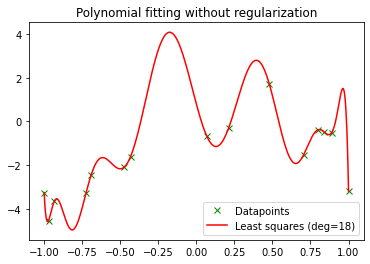

In [4]:
# visualize the least squares predictor
grid = np.linspace(-1,1,500)
plt.plot(x,y,'gx',grid,h_least(grid),'r-')
plt.legend(labels=['Datapoints','Least squares (deg={})'.format(deg)])
plt.title('Polynomial fitting without regularization')
plt.show()

## Using a Tikhonov regularization prevents overfitting

In [5]:
# construct the matrix X
X = np.zeros((m,deg+1))
for j in range(deg+1):
    X[:,j] = x**j
# define and solve the appropriate linear system       
lamb = 0.1;
A = np.transpose(X)@X+lamb*lamb*np.identity(deg+1)
c_tikho = np.linalg.solve(A,np.transpose(X)@y)
h_tikho = np.poly1d(c_tikho[::-1])

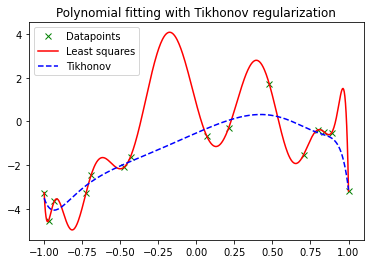

In [6]:
# visualize the Tikhonov predictor
plt.plot(x,y,'gx',grid,h_least(grid),'r-',grid,h_tikho(grid),'b--')
plt.legend(labels=['Datapoints','Least squares','Tikhonov'])
plt.title('Polynomial fitting with Tikhonov regularization')
plt.show()

## Using a squared-LASSO regularization also prevents overfitting


In [7]:
import cvxpy as cp

In [8]:
X_aux = np.vstack(( np.hstack((X,-X)), lamb*np.ones((1,2*deg+2)) ))
y_aux = np.hstack((y,0))
# define the optimization variables
c = cp.Variable(2*deg+2,pos=True)
# define the objective function
objective = cp.Minimize(cp.norm(X_aux@c-y_aux,2))
# solve the optimization problem
squareLASSO = cp.Problem(objective)
squareLASSO.solve()
# output the coefficient vector 
c_lasso = c.value[0:deg+1] - c.value[deg+1:2*deg+2]
h_lasso = np.poly1d(c_lasso[::-1])

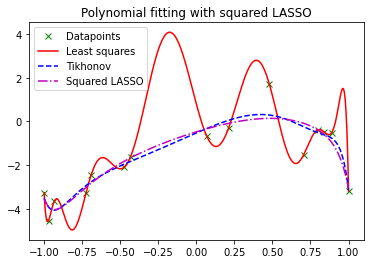

The number of nonzero coefficients is 6


In [9]:
# visualize the squared-LASSO predictor
plt.plot(x,y,'gx',grid,h_least(grid),'r-',grid,h_tikho(grid),'b--',grid,h_lasso(grid),'m-.')
plt.legend(labels=['Datapoints','Least squares','Tikhonov','Squared LASSO'])
plt.title('Polynomial fitting with squared LASSO')
plt.show()
# Check the sparsity of the coefficient vector
print('The number of nonzero coefficients is',sum(abs(c_lasso)>1e-5))